In [1]:
import random
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity
from sklearn import preprocessing
import nltk
import csv
import re
import math
from pprint import pprint
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt


import networkx as nx
from networkx import betweenness_centrality
from networkx import edge_betweenness_centrality
from networkx import load_centrality
from networkx import eigenvector_centrality

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA

from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from gensim.models import LdaMulticore

import en_core_web_sm

%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Test Split

In [3]:
train_set = pd.read_csv('/content/drive/MyDrive/DSBA M2/2 MLNS/Kaggle/my own work/temp_before_graph_features_train_set_March_20.csv')
test_set = pd.read_csv('/content/drive/MyDrive/DSBA M2/2 MLNS/Kaggle/my own work/temp_before_graph_features_test_set_March_20.csv')

In [4]:
# 去掉unnamed
train_set2 = train_set.iloc[:, 1:]
test_set2 = test_set.iloc[:, 1:]

In [5]:
# separate features from labels:
X = train_set.loc[:, (train_set.columns != 'label') & 
                     (train_set.columns != 'common_authors') & 
                     (train_set.columns != 'source_authors') & 
                     (train_set.columns != 'target_authors') & 
                     (train_set.columns != 'source_journal') & 
                     (train_set.columns != 'target_journal')]
y = train_set['label']
# y.astype(int)

In [6]:
test = test_set2.loc[:, (test_set2.columns != 'label') & 
                        (test_set2.columns != 'common_authors') & 
                        (test_set2.columns != 'source_authors') & 
                        (test_set2.columns != 'target_authors') & 
                        (test_set2.columns != 'source_journal') & 
                        (test_set2.columns != 'target_journal')]

## Random Forest

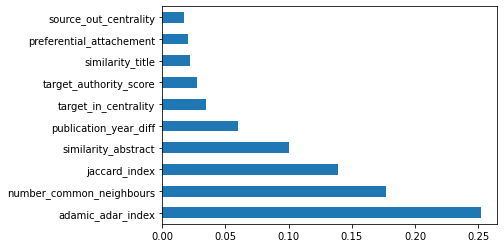

In [7]:
from sklearn.ensemble import RandomForestClassifier
# 1: retrain the complete model -> don't forget to change this to optimal one @ end
final_model = RandomForestClassifier(verbose=True)
final_model.fit(X, y)

# 2: predict on the test set
final_test_set = test_set.loc[:,(test_set.columns != 'source_authors') & 
                                (test_set.columns != 'common_authors') & 
                                (test_set.columns != 'target_authors') & 
                                (test_set.columns != 'label') & 
                                (test_set.columns != 'source_journal') & 
                                (test_set.columns != 'target_journal')]
predictions = final_model.predict(final_test_set)

# write out
out_df = test_set.copy()
data = {'id': list(out_df.index), 'category': predictions}
final_df = pd.DataFrame(data)


# 3: write file out
final_df.to_csv('/content/drive/MyDrive/DSBA M2/2 MLNS/Kaggle/my own work/submission_RF_March_20_1.csv',index=False, sep=',')

# plot the feature importance
feat_importances = pd.Series(final_model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
## RF first trial is Score: 0.97379